In [1]:
from unityagents import UnityEnvironment
import numpy as np
from nstep_ddpg_controller import NStepDDPGController
from datetime import datetime
import json
import matplotlib.pyplot as plt
from operator import itemgetter
%matplotlib inline

In [2]:
env = UnityEnvironment(file_name='../Reacher_20/Reacher.app')
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [8]:
def rolling_avg_scores(scores, window):
    if len(scores) <= window:
        return [np.mean(scores)]
    else:
        return [np.mean(scores[x:x+window]) for x in range(len(scores) - window + 1)]

def plot_results(series, names):
    for serie, name in zip(series, names):
        plt.plot(np.arange(len(serie)), serie)
        plt.plot(np.arange(19, len(serie)), rolling_avg_scores(serie, 20))
        plt.ylabel(name)
        plt.xlabel('Episode #')
        plt.show()

Episode 50/50 | Average Score: 36.51 | Surrogate: -0.64800 | Critic loss: 0.00475  

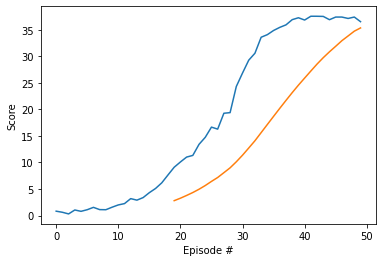

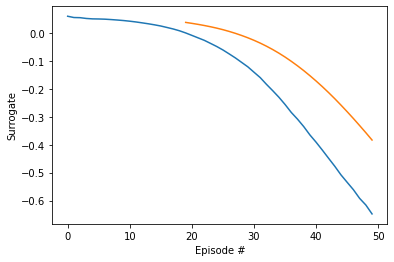

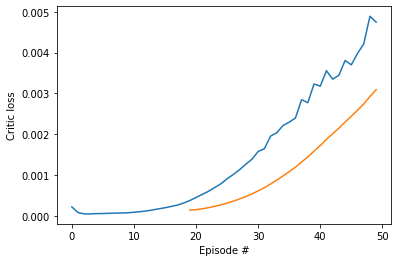

In [6]:
class Config:
    def __init__(self):
        self.num_episodes = 50
        self.batch_size = 64
        self.n_step = 3
        self.learning_rate = 5e-4
        self.gamma = 0.99
        self.mlp_specs = (200, 150)
        self.update_every = 4
        self.max_memory = 1e5
        self.tau = 1e-3
        
    def as_dict(self):
        return self.__dict__
    

controller = NStepDDPGController(env, brain_name, Config())
scores, surrogates, critic_losses = controller.solve()
plot_results((scores, surrogates, critic_losses), ('Score', 'Surrogate', 'Critic loss'))